<a href="https://colab.research.google.com/github/Chalithya/AISC2000_Group_01/blob/dev/ML2_Group_Assignment_1_Group_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>GROUP TREES</center></h1>

| STUDENT NAME | STUDENT CONTRIBUTION |
|:---:|:---:|
| MUKUL GARG | Exploratory Data Analysis (EDA) |
| GOKUL KRISHNA POURNAMI GOPI | Preprocessing and Data Cleaning |
| OBIANUJU NONYEREM ANUMA | Feature Engineering |
| APARNA JAYAKUMAR RESMI | Decision Tree Model |
| KANIKA | Random Forest Model |
| CLIFFORD ADDISON | AdaBoost Model |
| AMRUTH RAJ MANCHIKANTI | XGBoost Model |
| ABDULLAH IFTEQAR MOHAMMED | Lime/Shap Comparison (Feature Importance from Decision Tree and Random Forest) |
| SUBHASH PAVAN CHAKRAVARTHY SOMAROUTHU | Lime/Shap Comparison (Feature Importance from AdaBoost and XGBoost) |
| WATAPOTHA KOSINNAGE CHALITHYA SANGEETH KUMARASINGHE | GitHub Maintenance and Flask Deployment |

In [ ]:
# Import all libraries
import pandas as pd
import numpy as np
import json
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# import researchpy as rp
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Load the Data
- The Yelp dataset is in **JSON** format. We will load the data and convert it to a **DataFrame** for easier manipulation.

In [ ]:
# Load Yelp business data
business_data = pd.read_json('/content/drive/MyDrive/DriveDDL/yelp_academic_dataset_business.json', lines=True)

In [ ]:
business_data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [ ]:
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [ ]:
# Rename name to business name
business_data.rename(columns={'name': 'business_name'}, inplace=True)

In [ ]:
# Rename stars and review_count to business_rating_stars and business_review_count
business_data.rename(columns={'stars': 'business_rating_stars', 'review_count': 'business_review_count'}, inplace=True)

In [ ]:
# Load Yelp checkin data
checkin_data = pd.read_json('/content/drive/MyDrive/DriveDDL/yelp_academic_dataset_checkin.json', lines=True)

In [ ]:
checkin_data

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


In [ ]:
checkin_data.rename(columns={'date': 'checkin_date'}, inplace=True)
checkin_data.head()

,business_id,checkin_date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [ ]:
# Load Yelp tip data
tip_data = pd.read_json('/content/drive/MyDrive/DriveDDL/yelp_academic_dataset_tip.json', lines=True)

In [ ]:
tip_data

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


In [ ]:
# Rename date to tip date
tip_data.rename(columns={'date': 'tip_date'}, inplace=True)

In [ ]:
# Rename text to tip reason
tip_data.rename(columns={'text': 'tip_reason'}, inplace=True)

In [ ]:
# Load Yelp user data
user_data = pd.read_json('/content/drive/MyDrive/DriveDDL/yelp_academic_dataset_user.json', lines=True, nrows=100000)

In [ ]:
user_data

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,P6a7RG2Kk6hK5Dsut3m5ZQ,Susan,4,2013-12-20 01:59:14,2,1,0,,"pLOvDJ3zmyC9hsqcK4VD7Q, 3ZGgTuZkvM6vi8a2fkqDrQ...",0,...,0,0,0,0,0,0,0,0,0,0
99996,4ltGDeMtM_F0ORS40iUlog,Erin,39,2014-01-26 02:31:13,50,4,7,,xNpXjAmA-xRBfLsR9T-mDw,0,...,0,0,0,0,0,0,0,0,0,0
99997,RcXQ_UtN-o7FtW9Dy59W5g,Sam,35,2012-07-16 17:16:26,19,6,6,,"qEcneZMTQ9HbGtMvYZT8cw, yWi5JrucUn4GFeqHdQ7QpQ...",1,...,0,0,0,0,0,0,0,0,0,0
99998,sSrK8m463Q3WmfzIXOgB0g,Jared,70,2014-03-23 20:47:51,39,4,15,2016,"EsuvqZLOk0HjhLzE02RAXw, GcvW_eODuW1jDNwqHYb7kA...",5,...,0,0,0,0,1,1,0,0,1,1


In [ ]:
# Rename name to customer name
user_data.rename(columns={'name': 'customer_name'}, inplace=True)

In [ ]:
# Rename useful, funny and cool to yelp_useful, yelp_funny, yelp_cool.
# This data seems to be user review on the app itself
user_data.rename(columns={'useful': 'yelp_useful', 'funny': 'yelp_funny', 'cool': 'yelp_cool'}, inplace=True)

In [ ]:
# Rename review_count to yelp review count
user_data.rename(columns={'review_count': 'yelp_review_count'}, inplace=True)

In [ ]:
# user_data.info()

In [ ]:
# Load Yelp review data
review_data = pd.read_json('/content/drive/MyDrive/DriveDDL/yelp_academic_dataset_review.json', lines=True, nrows=100000)

In [ ]:
review_data

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
99995,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56
99996,xH1AoE-4nf2ECGQJRjO4_g,2clTdtp-BjphxLjN83CpUA,G0xz3kyRhRi6oZl7KfR0pA,1,1,0,0,The equipment is so old and so felty! I just u...,2015-04-05 23:31:52
99997,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15
99998,6NfkodAdhvI89xONXuBC3A,rnNQzeKJbvqVCsYsL10mkQ,dChRGpit9fM_kZK5pafNyA,2,0,0,0,Came here for brunch - had an omlette ($19 + t...,2018-06-11 12:45:08


In [ ]:
# Rename text to business review text
review_data.rename(columns={'text': 'business_review_text'}, inplace=True)

In [ ]:
# Rename useful, funny and cool to business_useful, business_funny and business_cool.
# This seems to be user rating for the business on Yelp.
review_data.rename(columns={'useful': 'business_useful', 'funny': 'business_funny', 'cool': 'business_cool'}, inplace=True)

In [ ]:
# Rename stars to user biz rating stars
review_data.rename(columns={'stars': 'user_biz_rating_stars'}, inplace=True)

In [ ]:
# Rename the date column
review_data.rename(columns={'date': 'review_date'}, inplace=True)
review_data.head()

,review_id,user_id,business_id,user_biz_rating_stars,business_useful,business_funny,business_cool,business_review_text,review_date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


### 2. Exploratory Data Analysis (EDA)
- Exploring key features, identifying missing values, and visualizing the data.

In [ ]:
# Merge DataFrames
merged_data = pd.merge(business_data, checkin_data, on='business_id', how='inner')
merged_data = pd.merge(merged_data, tip_data, on='business_id', how='inner')
merged_data = pd.merge(merged_data, review_data, on='business_id', how='inner')
merged_data = pd.merge(user_data, merged_data, left_on='user_id', right_on='user_id_y', how='inner')

combined_data = merged_data

In [ ]:
# Display the head of the data
combined_data.head()

,user_id,customer_name,yelp_review_count,yelping_since,yelp_useful,yelp_funny,yelp_cool,elite,friends,fans,...,tip_date,compliment_count,review_id,user_id_y,user_biz_rating_stars,business_useful,business_funny,business_cool,business_review_text,review_date
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,2011-07-16 00:21:29,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,3,1,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,2010-01-01 23:02:28,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,3,1,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56
2,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,2012-08-09 02:15:55,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,3,1,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56
3,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,2014-06-15 16:36:50,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,3,1,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56
4,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,2015-10-24 02:35:22,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,3,1,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56


In [ ]:
# Display the tail of the data
combined_data.tail()

,user_id,customer_name,yelp_review_count,yelping_since,yelp_useful,yelp_funny,yelp_cool,elite,friends,fans,...,tip_date,compliment_count,review_id,user_id_y,user_biz_rating_stars,business_useful,business_funny,business_cool,business_review_text,review_date
3417017,sSrK8m463Q3WmfzIXOgB0g,Jared,70,2014-03-23 20:47:51,39,4,15,2016,"EsuvqZLOk0HjhLzE02RAXw, GcvW_eODuW1jDNwqHYb7kA...",5,...,2013-09-11 01:09:23,0,4DnB9KR7ENHk1Vd-6f4RtQ,sSrK8m463Q3WmfzIXOgB0g,3,1,0,0,Came here with a party of 9 when down visiting...,2016-05-19 11:59:39
3417018,sSrK8m463Q3WmfzIXOgB0g,Jared,70,2014-03-23 20:47:51,39,4,15,2016,"EsuvqZLOk0HjhLzE02RAXw, GcvW_eODuW1jDNwqHYb7kA...",5,...,2015-01-29 02:22:39,0,4DnB9KR7ENHk1Vd-6f4RtQ,sSrK8m463Q3WmfzIXOgB0g,3,1,0,0,Came here with a party of 9 when down visiting...,2016-05-19 11:59:39
3417019,sSrK8m463Q3WmfzIXOgB0g,Jared,70,2014-03-23 20:47:51,39,4,15,2016,"EsuvqZLOk0HjhLzE02RAXw, GcvW_eODuW1jDNwqHYb7kA...",5,...,2014-05-13 21:09:21,0,4DnB9KR7ENHk1Vd-6f4RtQ,sSrK8m463Q3WmfzIXOgB0g,3,1,0,0,Came here with a party of 9 when down visiting...,2016-05-19 11:59:39
3417020,sSrK8m463Q3WmfzIXOgB0g,Jared,70,2014-03-23 20:47:51,39,4,15,2016,"EsuvqZLOk0HjhLzE02RAXw, GcvW_eODuW1jDNwqHYb7kA...",5,...,2022-01-19 00:35:04,0,4DnB9KR7ENHk1Vd-6f4RtQ,sSrK8m463Q3WmfzIXOgB0g,3,1,0,0,Came here with a party of 9 when down visiting...,2016-05-19 11:59:39
3417021,sSrK8m463Q3WmfzIXOgB0g,Jared,70,2014-03-23 20:47:51,39,4,15,2016,"EsuvqZLOk0HjhLzE02RAXw, GcvW_eODuW1jDNwqHYb7kA...",5,...,2012-01-04 18:12:01,0,4DnB9KR7ENHk1Vd-6f4RtQ,sSrK8m463Q3WmfzIXOgB0g,3,1,0,0,Came here with a party of 9 when down visiting...,2016-05-19 11:59:39


In [64]:
combined_data['user_id'].value_counts()

,count
user_id,
CfX4sTIFFNaRchNswqhVfg,2096
xqS2PjKu16g2cFDBNgJ8Ng,1700
PahxTM-klXhWy4te9wiOXw,1533
tNq35k92WAkSLSqeof03hg,1483
Xw7ZjaGfr0WNVt6s_5KZfA,1319
...,...
6_V14b0ob6Cs_QmgcqZJvQ,1
RPx4Li1s4T73Y1AV2VuJGw,1
kkNFDL_bfM4BP65UEaDs_w,1


In [65]:
combined_data['business_id'].value_counts()

,count
business_id,
GBTPC53ZrG1ZBY3DT8Mbcw,385472
vN6v8m4DO45Z4pp8yxxF_w,94112
PY9GRfzr4nTZeINf346QOw,88776
W4ZEKkva9HpAdZG88juwyQ,65250
8uF-bhJFgT4Tn6DTb27viA,60606
...,...
IDtJHnDQdrIcvFlWtrSEpg,1
yfZN25vP-9WPIdyDd7jOrA,1
xpmcxoWG0w9HkqTo6AClUQ,1


In [ ]:
# Check the dimension of the dataframe
combined_data.shape

(3417022, 49)

In [ ]:
# Check info on the data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417022 entries, 0 to 3417021
Data columns (total 49 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   user_id                object        
 1   customer_name          object        
 2   yelp_review_count      int64         
 3   yelping_since          object        
 4   yelp_useful            int64         
 5   yelp_funny             int64         
 6   yelp_cool              int64         
 7   elite                  object        
 8   friends                object        
 9   fans                   int64         
 10  average_stars          float64       
 11  compliment_hot         int64         
 12  compliment_more        int64         
 13  compliment_profile     int64         
 14  compliment_cute        int64         
 15  compliment_list        int64         
 16  compliment_note        int64         
 17  compliment_plain       int64         
 18  compliment_cool       

In [ ]:
# Check for missing values
combined_data.isnull().sum()

,0
user_id,0
customer_name,0
yelp_review_count,0
yelping_since,0
yelp_useful,0
yelp_funny,0
yelp_cool,0
elite,0
friends,0
fans,0


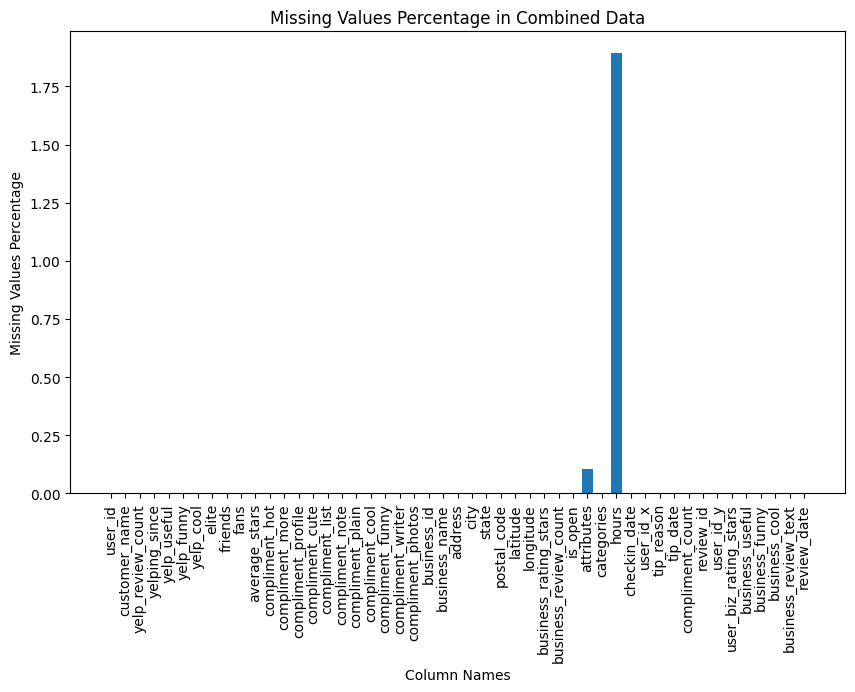

In [ ]:
# Visualizing the missing data percentages
missing_percentages = (combined_data.isnull().sum() / len(combined_data)) * 100
plt.figure(figsize=(10, 6))
plt.bar(missing_percentages.index, missing_percentages.values)
plt.xlabel('Column Names')
plt.ylabel('Missing Values Percentage')
plt.title('Missing Values Percentage in Combined Data')
plt.xticks(rotation=90)
plt.show()

In [34]:
# Display the data description
combined_data.describe()

,yelp_review_count,yelp_useful,yelp_funny,yelp_cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,...,business_rating_stars,business_review_count,is_open,tip_date,compliment_count,user_biz_rating_stars,business_useful,business_funny,business_cool,review_date
count,3.417022e+06,3.417022e+06,3.417022e+06,3.417022e+06,3.417022e+06,3.417022e+06,3.417022e+06,3.417022e+06,3.417022e+06,3.417022e+06,...,3.417022e+06,3.417022e+06,3.417022e+06,3417022,3.417022e+06,3.417022e+06,3.417022e+06,3.417022e+06,3.417022e+06,3417022
mean,1.828482e+02,4.793168e+02,1.969224e+02,2.953562e+02,1.601298e+01,3.882812e+00,2.139178e+01,3.507913e+00,2.606082e+00,1.533877e+00,...,3.975618e+00,1.336418e+03,8.889533e-01,2014-10-27 14:33:21.681199616,1.091652e-02,4.066224e+00,8.993946e-01,3.225022e-01,4.693763e-01,2014-08-12 03:31:28.980876800
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,5.000000e+00,0.000000e+00,2009-04-16 13:11:49,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2005-03-01 17:47:15
25%,2.100000e+01,1.700000e+01,3.000000e+00,4.000000e+00,0.000000e+00,3.620000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.000000e+00,3.770000e+02,1.000000e+00,2012-07-06 00:41:29,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2012-11-12 20:18:52
50%,6.200000e+01,6.500000e+01,1.500000e+01,2.000000e+01,2.000000e+00,3.910000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.000000e+00,8.570000e+02,1.000000e+00,2014-05-09 18:27:02,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2014-12-05 00:23:19
75%,1.830000e+02,2.610000e+02,6.900000e+01,1.020000e+02,1.000000e+01,4.200000e+00,4.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,...,4.000000e+00,2.062000e+03,1.000000e+00,2016-10-29 22:24:47,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2016-07-30 17:57:06
max,1.656700e+04,1.730890e+05,9.845900e+04,1.448490e+05,3.138000e+03,5.000000e+00,1.094400e+04,4.347000e+03,7.039000e+03,1.622000e+03,...,5.000000e+00,4.554000e+03,1.000000e+00,2022-01-19 16:49:51,4.000000e+00,5.000000e+00,9.100000e+01,3.900000e+01,4.900000e+01,2018-10-04 18:20:00
std,3.954775e+02,2.186832e+03,1.224940e+03,1.742185e+03,6.863034e+01,5.289563e-01,1.904472e+02,4.753836e+01,7.336942e+01,2.306011e+01,...,4.418232e-01,1.329388e+03,3.141900e-01,NaN,1.102881e-01,1.090623e+00,1.910755e+00,1.209510e+00,1.385087e+00,NaN


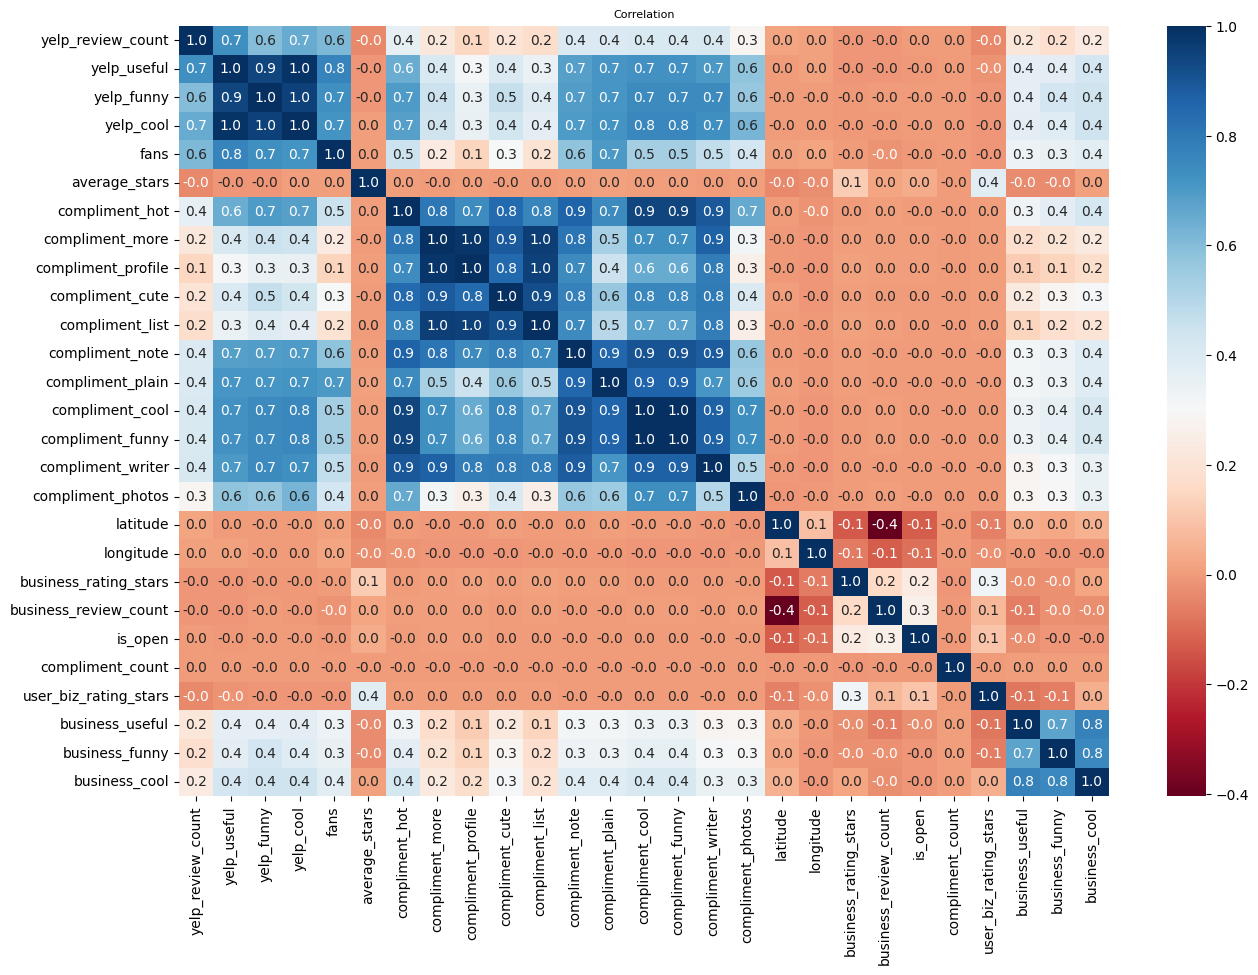

In [35]:
# Correlation plot
plt.figure(figsize=(15,10))
sns.heatmap(
    combined_data.select_dtypes(include=['number']).corr(),
    annot=True,
    cmap='RdBu',
    fmt='.1f'
)

plt.title("Correlation",fontsize=8)
plt.show()

In [36]:
# Check the predictors with high correlation (>=80%) before dropping columns

# Calculate the correlation matrix
corr_matrix = combined_data.select_dtypes(include=['number']).corr()

# Get the upper triangular part of the correlation matrix
upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))

# Find the pairs with correlation greater than or equal to 80%
high_corr_pairs = [(upper_tri.index[i], upper_tri.columns[j], round(upper_tri.iloc[i, j], 2))
                  for i in range(upper_tri.shape[0])
                  for j in range(i+1, upper_tri.shape[1])
                  if abs(upper_tri.iloc[i, j]) >= 0.8]

# Print the pairs with high correlation
for pair in high_corr_pairs:
    print(f"Correlation between {pair[0]} and {pair[1]}: {pair[2]}")

Correlation between yelp_useful and yelp_funny: 0.94
Correlation between yelp_useful and yelp_cool: 0.99
Correlation between yelp_funny and yelp_cool: 0.95
Correlation between compliment_hot and compliment_more: 0.8
Correlation between compliment_hot and compliment_cute: 0.84
Correlation between compliment_hot and compliment_note: 0.87
Correlation between compliment_hot and compliment_cool: 0.95
Correlation between compliment_hot and compliment_funny: 0.95
Correlation between compliment_hot and compliment_writer: 0.89
Correlation between compliment_more and compliment_profile: 0.98
Correlation between compliment_more and compliment_cute: 0.89
Correlation between compliment_more and compliment_list: 0.96
Correlation between compliment_more and compliment_note: 0.81
Correlation between compliment_more and compliment_writer: 0.87
Correlation between compliment_profile and compliment_cute: 0.85
Correlation between compliment_profile and compliment_list: 0.95
Correlation between compliment_

In [37]:
# Drop predictors with high correlation amongst the pair

# Get the columns to drop
cols_to_drop = [pair[0] if abs(pair[2]) >= 0.8 else pair[1] for pair in high_corr_pairs]

# Drop the columns with high correlation
combined_data.drop(cols_to_drop, axis=1, inplace=True)

In [38]:
# Check the predictors with high correlation (>=80%) after dropping columns

# Calculate the correlation matrix
corr_matrix = combined_data.select_dtypes(include=['number']).corr()

# Get the upper triangular part of the correlation matrix
upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))

# Find the pairs with correlation greater than or equal to 80%
high_corr_pairs = [(upper_tri.index[i], upper_tri.columns[j], round(upper_tri.iloc[i, j], 2))
                  for i in range(upper_tri.shape[0])
                  for j in range(i+1, upper_tri.shape[1])
                  if abs(upper_tri.iloc[i, j]) >= 0.8]

# Print the pairs with high correlation
for pair in high_corr_pairs:
    print(f"Correlation between {pair[0]} and {pair[1]}: {pair[2]}")

In [39]:
combined_data.shape # Check the shape

(3417022, 39)

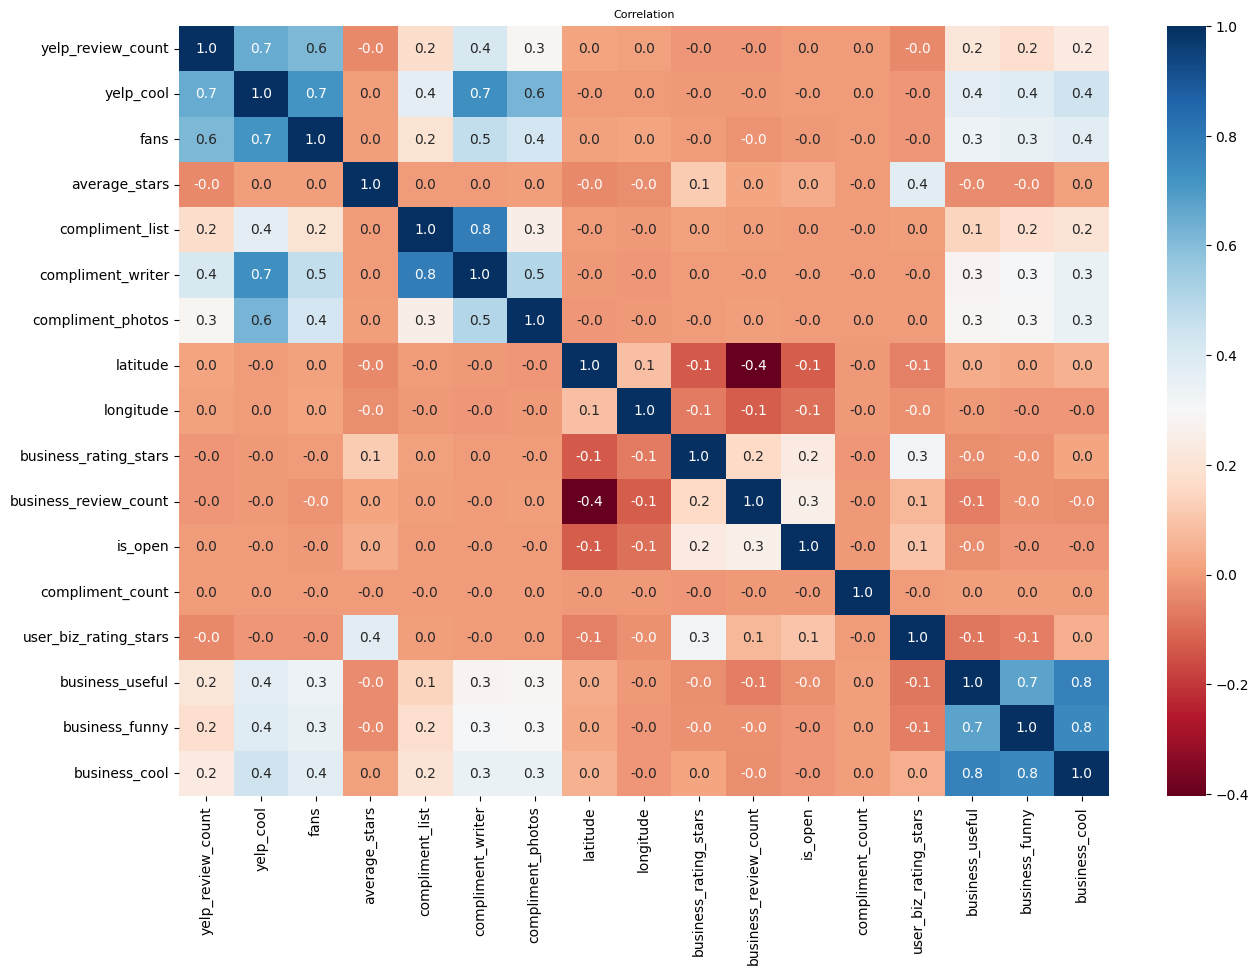

In [40]:
# Correlation plot after dropping one of the predictor pairs that were highly correlated
plt.figure(figsize=(15,10))
sns.heatmap(
    combined_data.select_dtypes(include=['number']).corr(),
    annot=True,
    cmap='RdBu',
    fmt='.1f'
)

plt.title("Correlation",fontsize=8)
plt.show()

In [41]:
# drop business useful and business funny columns since they are highly correlated with business_cool
combined_data.drop(['business_useful', 'business_funny'], axis=1, inplace=True)

<ipython-input-42-9cbcf6137aab>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_data['latitude'], shade=True)


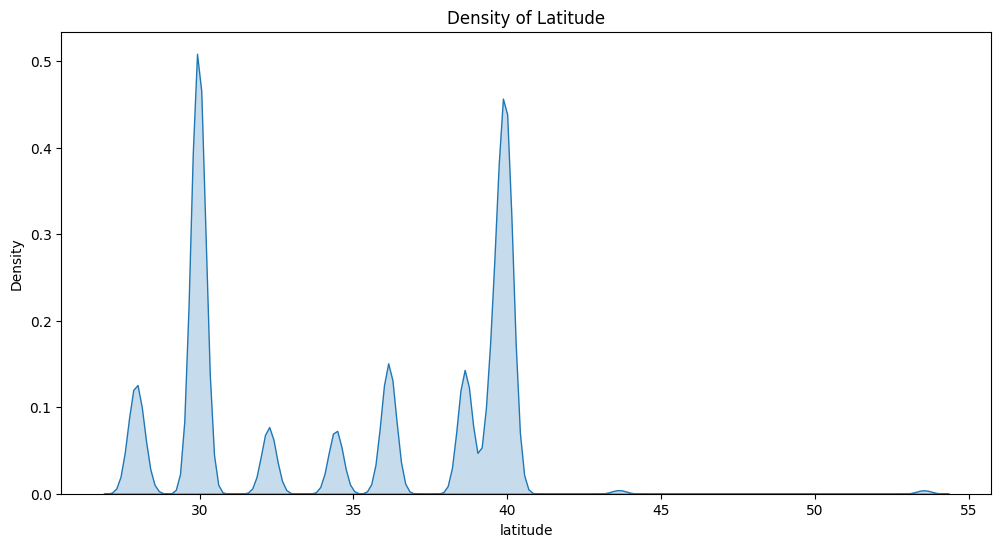

<ipython-input-42-9cbcf6137aab>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_data['longitude'], shade=True)


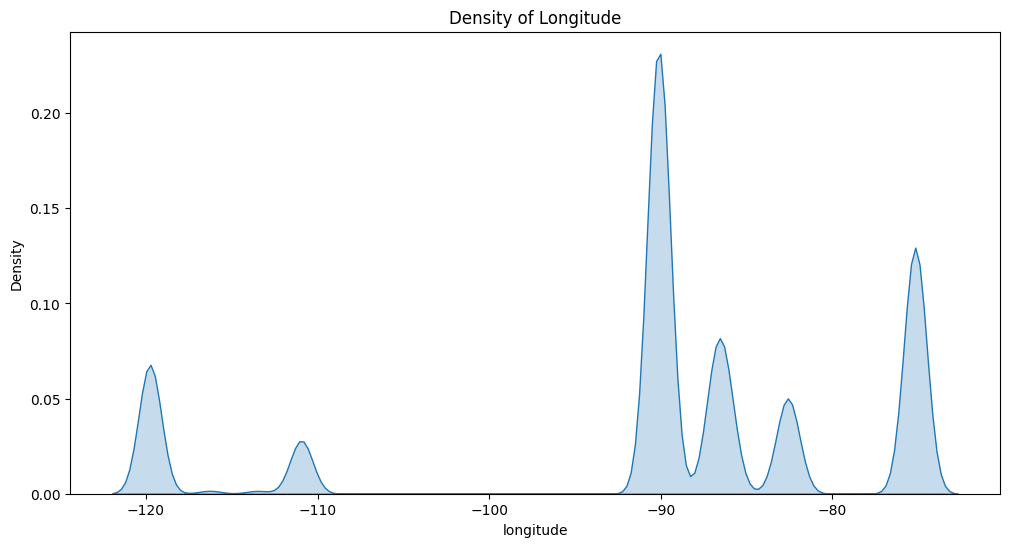

In [42]:
# Density plots
plt.figure(figsize=(12, 6))
sns.kdeplot(combined_data['latitude'], shade=True)
plt.title('Density of Latitude')
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(combined_data['longitude'], shade=True)
plt.title('Density of Longitude')
plt.show()

In [43]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417022 entries, 0 to 3417021
Data columns (total 37 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   user_id                object        
 1   customer_name          object        
 2   yelp_review_count      int64         
 3   yelping_since          object        
 4   yelp_cool              int64         
 5   elite                  object        
 6   friends                object        
 7   fans                   int64         
 8   average_stars          float64       
 9   compliment_list        int64         
 10  compliment_writer      int64         
 11  compliment_photos      int64         
 12  business_id            object        
 13  business_name          object        
 14  address                object        
 15  city                   object        
 16  state                  object        
 17  postal_code            object        
 18  latitude              

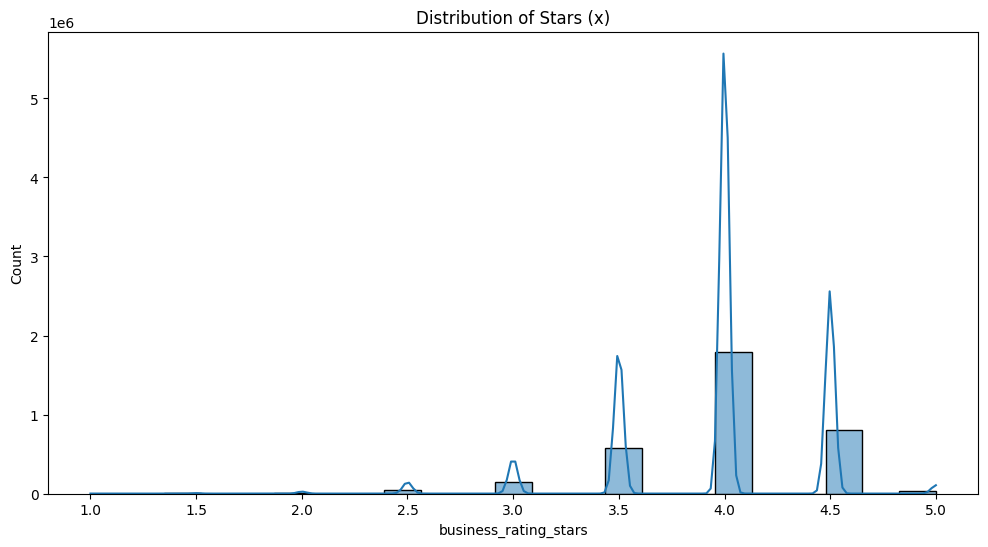

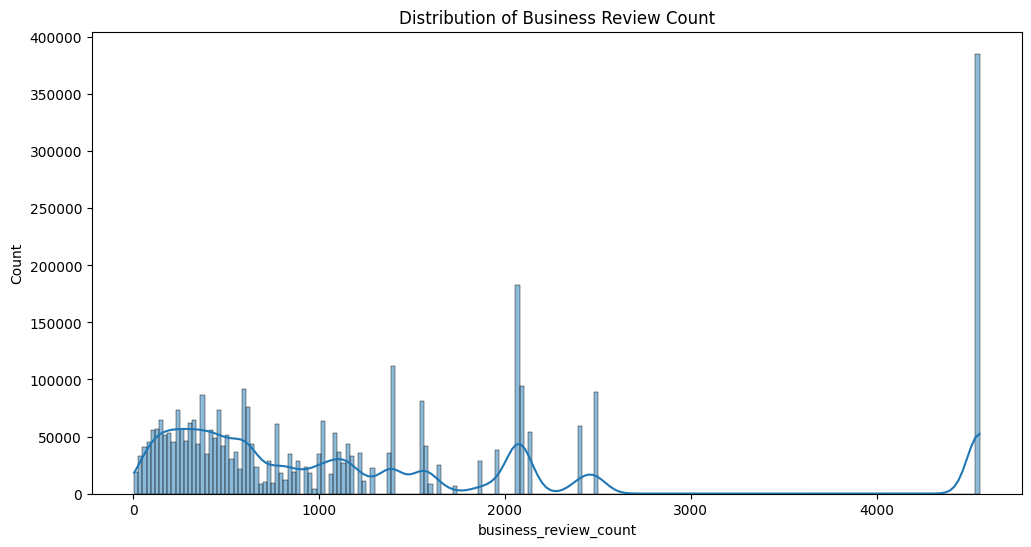

In [44]:
# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(combined_data['business_rating_stars'], kde=True)
plt.title('Distribution of Stars (x)')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(combined_data['business_review_count'], kde=True)
plt.title('Distribution of Business Review Count')
plt.show()

In [45]:
# # Visualize the outliers
# fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# # Create a box plot for each column
# axs[0, 0].boxplot(combined_data['stars_x'], vert=False)
# axs[0, 0].set_title('Box Plot of Stars X')
# axs[0, 0].set_xlabel('Value')
# axs[0, 0].set_ylabel('')

# axs[0, 1].boxplot(combined_data['review_count_x'], vert=False)
# axs[0, 1].set_title('Box Plot of Review Count X')
# axs[0, 1].set_xlabel('Value')
# axs[0, 1].set_ylabel('')

# axs[1, 0].boxplot(combined_data['stars_y'], vert=False)
# axs[1, 0].set_title('Box Plot of Stars Y')
# axs[1, 0].set_xlabel('Value')
# axs[1, 0].set_ylabel('')

# axs[1, 1].boxplot(combined_data['review_count_y'], vert=False)
# axs[1, 1].set_title('Box Plot of Review Count Y')
# axs[1, 1].set_xlabel('Value')
# axs[1, 1].set_ylabel('')

# # Show the plot
# plt.show()

#### Univariate Analysis

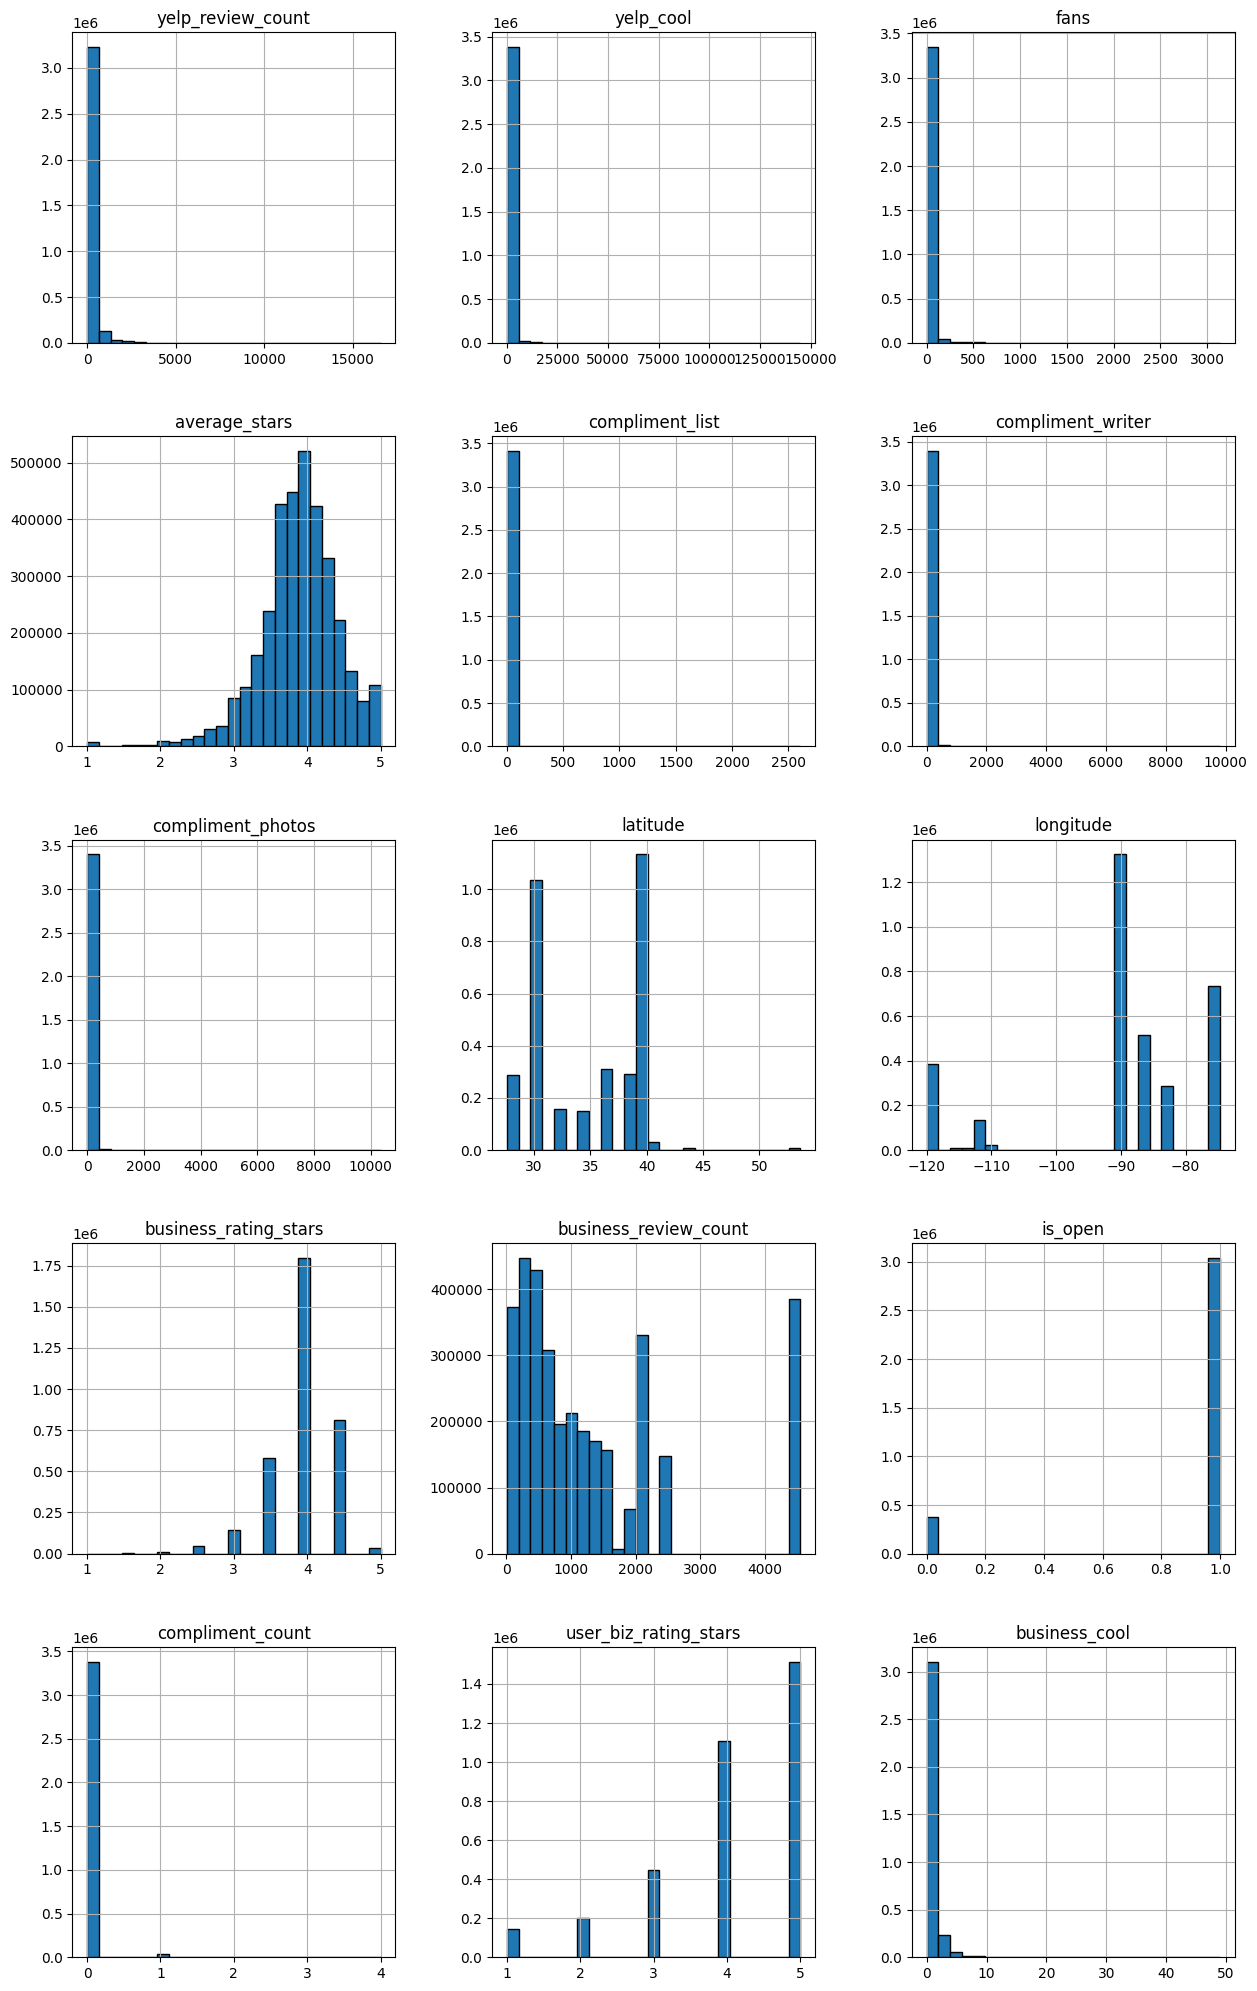

In [46]:
# Select only numeric columns from the DataFrame
numeric_data = combined_data.select_dtypes(include=[np.number])

# Create histograms for each numeric column
numeric_data.hist(bins=25, figsize=(15, 25), layout=(5, -1), edgecolor="black")
plt.show()

### 3. Data Preprocessing and Feature Engineering
- Preparing the data for our model training (handling missing values, encoding categorical features, and creating new features if necessary.)

In [47]:
# View the check_in dates structure
combined_data.checkin_date[:6]

,checkin_date
0,"2010-02-18 23:52:03, 2010-02-20 01:19:24, 2010..."
1,"2010-02-18 23:52:03, 2010-02-20 01:19:24, 2010..."
2,"2010-02-18 23:52:03, 2010-02-20 01:19:24, 2010..."
3,"2010-02-18 23:52:03, 2010-02-20 01:19:24, 2010..."
4,"2010-02-18 23:52:03, 2010-02-20 01:19:24, 2010..."
5,"2010-02-18 23:52:03, 2010-02-20 01:19:24, 2010..."


In [48]:
# Get the last date of customer visit in the checkin_date column
combined_data['last_checkin_date'] = combined_data['checkin_date'].apply(lambda dates: dates[-19:] if dates else None)

# Convert last checkin date to date time
combined_data['last_checkin_date'] = pd.to_datetime(combined_data['last_checkin_date'], errors='coerce')

# Get year of last checkin date
combined_data['last_checkin_year'] = combined_data['last_checkin_date'].dt.year

combined_data.head()

,user_id,customer_name,yelp_review_count,yelping_since,yelp_cool,elite,friends,fans,average_stars,compliment_list,...,tip_date,compliment_count,review_id,user_id_y,user_biz_rating_stars,business_cool,business_review_text,review_date,last_checkin_date,last_checkin_year
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,2011-07-16 00:21:29,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56,2018-12-31 19:32:55,2018
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,2010-01-01 23:02:28,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56,2018-12-31 19:32:55,2018
2,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,2012-08-09 02:15:55,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56,2018-12-31 19:32:55,2018
3,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,2014-06-15 16:36:50,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56,2018-12-31 19:32:55,2018
4,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,2015-10-24 02:35:22,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56,2018-12-31 19:32:55,2018


In [49]:
# Get the difference between the last checkin date and the review date
combined_data['days_since_last_checkin'] = (combined_data['review_date'] - combined_data['last_checkin_date']).dt.days

In [50]:
# Get days since last checkin greater than 0
combined_data[combined_data['days_since_last_checkin'] > 0].head()

,user_id,customer_name,yelp_review_count,yelping_since,yelp_cool,elite,friends,fans,average_stars,compliment_list,...,compliment_count,review_id,user_id_y,user_biz_rating_stars,business_cool,business_review_text,review_date,last_checkin_date,last_checkin_year,days_since_last_checkin
6446,0G-QF457q_0Z_jKqh6xWiA,Joi,2009,2008-03-12 19:13:45,20385,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","K8h4ypoVZAnmhC2dHKsDrQ, 7nS_R5h4YiZjgH532k_8gA...",944,4.10,76,...,0,J696DV84xuEC54hbZJPdMQ,0G-QF457q_0Z_jKqh6xWiA,4,10,It seems that true vintage shops are themselve...,2013-05-31 22:33:22,2013-05-16 21:36:56,2013,15
6447,0G-QF457q_0Z_jKqh6xWiA,Joi,2009,2008-03-12 19:13:45,20385,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","K8h4ypoVZAnmhC2dHKsDrQ, 7nS_R5h4YiZjgH532k_8gA...",944,4.10,76,...,0,J696DV84xuEC54hbZJPdMQ,0G-QF457q_0Z_jKqh6xWiA,4,10,It seems that true vintage shops are themselve...,2013-05-31 22:33:22,2013-05-16 21:36:56,2013,15
36494,-AJV31rH5tZmKI0f0rlQnA,Starr,363,2010-05-03 02:44:04,439,"2013,2014,2015,2016,2017,2018,2019,20,20,2021","_HlF1_dpaL3RAE8u8KoWUg, Kw9Evl_lld0am_D1IgPjkw...",57,3.97,7,...,0,5eFE-yHFqUXf1seidyaNpA,-AJV31rH5tZmKI0f0rlQnA,4,1,This was one of my first real-food meals after...,2013-06-28 18:19:52,2013-06-22 23:11:41,2013,5
36495,-AJV31rH5tZmKI0f0rlQnA,Starr,363,2010-05-03 02:44:04,439,"2013,2014,2015,2016,2017,2018,2019,20,20,2021","_HlF1_dpaL3RAE8u8KoWUg, Kw9Evl_lld0am_D1IgPjkw...",57,3.97,7,...,0,5eFE-yHFqUXf1seidyaNpA,-AJV31rH5tZmKI0f0rlQnA,4,1,This was one of my first real-food meals after...,2013-06-28 18:19:52,2013-06-22 23:11:41,2013,5
36496,-AJV31rH5tZmKI0f0rlQnA,Starr,363,2010-05-03 02:44:04,439,"2013,2014,2015,2016,2017,2018,2019,20,20,2021","_HlF1_dpaL3RAE8u8KoWUg, Kw9Evl_lld0am_D1IgPjkw...",57,3.97,7,...,0,5eFE-yHFqUXf1seidyaNpA,-AJV31rH5tZmKI0f0rlQnA,4,1,This was one of my first real-food meals after...,2013-06-28 18:19:52,2013-06-22 23:11:41,2013,5


In [51]:
# Get the difference between tip date and review date
combined_data['days_since_tip'] = (combined_data['review_date'] - combined_data['tip_date']).dt.days
# Get days since tip (from review date) greater than 0
combined_data[combined_data['days_since_tip'] > 0].head()

,user_id,customer_name,yelp_review_count,yelping_since,yelp_cool,elite,friends,fans,average_stars,compliment_list,...,review_id,user_id_y,user_biz_rating_stars,business_cool,business_review_text,review_date,last_checkin_date,last_checkin_year,days_since_last_checkin,days_since_tip
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56,2018-12-31 19:32:55,2018,-3004,282
8,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56,2018-12-31 19:32:55,2018,-3004,233
74,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56,2018-12-31 19:32:55,2018,-3004,65
111,vVukUtqoLF5BvH_VtQFNoA,Charlene,37,2011-01-29 17:18:59,27,,"zkK6c9BcDyqreU0fqI_JLQ, opI1hhhFqElB6pptNH9ZqA...",4,4.51,0,...,hdMd4_o21sQSPGIHV5GYbw,vVukUtqoLF5BvH_VtQFNoA,5,0,I have been going to brew brothers since I was...,2011-02-21 18:40:06,2022-01-19 01:07:02,2022,-3985,155
144,vVukUtqoLF5BvH_VtQFNoA,Charlene,37,2011-01-29 17:18:59,27,,"zkK6c9BcDyqreU0fqI_JLQ, opI1hhhFqElB6pptNH9ZqA...",4,4.51,0,...,hdMd4_o21sQSPGIHV5GYbw,vVukUtqoLF5BvH_VtQFNoA,5,0,I have been going to brew brothers since I was...,2011-02-21 18:40:06,2022-01-19 01:07:02,2022,-3985,88


In [52]:
# Drop date columns
combined_data.drop(['checkin_date', 'tip_date', 'review_date', 'last_checkin_date'], axis=1, inplace=True)
combined_data.head()

,user_id,customer_name,yelp_review_count,yelping_since,yelp_cool,elite,friends,fans,average_stars,compliment_list,...,tip_reason,compliment_count,review_id,user_id_y,user_biz_rating_stars,business_cool,business_review_text,last_checkin_year,days_since_last_checkin,days_since_tip
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,Outstanding fried chicken. Service meh.,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,-278
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,Wow can't say I have had better food in New Or...,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,282
2,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,"OMG....,,,am at the Praline Connection again!",0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,-668
3,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,The Taste of Soul Platter is the BOMB!!! They ...,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,-1343
4,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,"Two wirds. Real bad, yelp is tellibg me ro.s...",0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,-1839


In [53]:
# Get sign up year from "yelping_since" column
combined_data['yelp_sign_up_year'] = pd.to_datetime(combined_data['yelping_since']).dt.year
combined_data.head()

,user_id,customer_name,yelp_review_count,yelping_since,yelp_cool,elite,friends,fans,average_stars,compliment_list,...,compliment_count,review_id,user_id_y,user_biz_rating_stars,business_cool,business_review_text,last_checkin_year,days_since_last_checkin,days_since_tip,yelp_sign_up_year
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,-278,2009
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,282,2009
2,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,-668,2009
3,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,-1343,2009
4,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,251,...,0,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,-1839,2009


In [54]:
# Drop "yelping since" field, since we now have the sign up year
combined_data.drop('yelping_since', axis=1, inplace=True)

In [55]:
# Get latest year for elite customers
combined_data['elites_last_year'] = combined_data['elite'].apply(lambda dates: int(dates[-4:].replace(",", "")) if dates else None)
# combined_data.head()

In [56]:
# Drop elite column seeing that we have the sign up year and elite's last year
combined_data.drop('elite', axis=1, inplace=True)

In [57]:
# Get the customer loyalty period between the sign up year and the elites last year
combined_data['customer_loyalty_period'] = combined_data['elites_last_year'] - combined_data['yelp_sign_up_year']

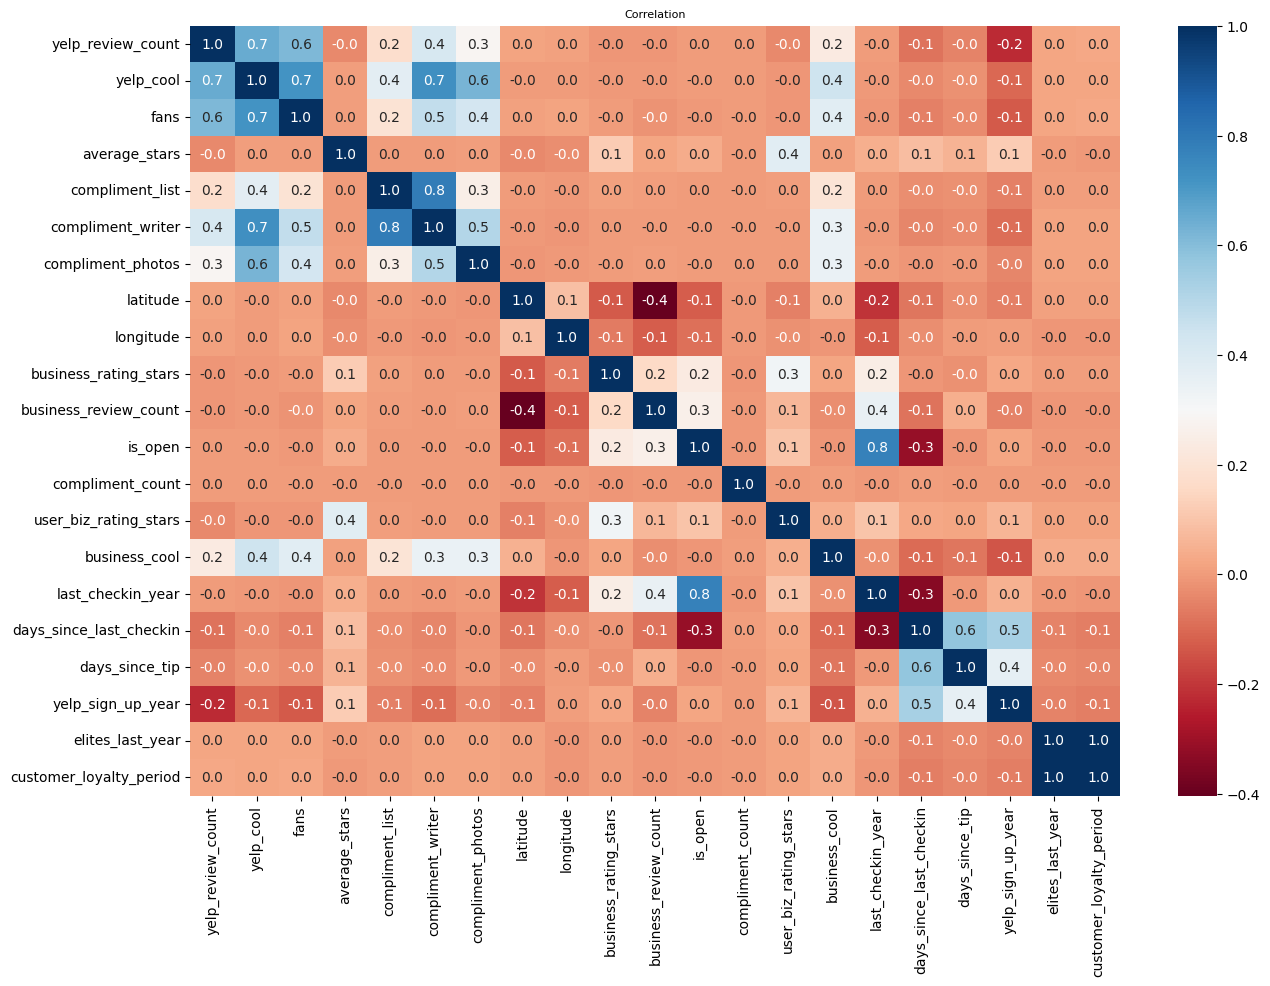

In [58]:
# Correlation plot to see any correlation among generated columns
plt.figure(figsize=(15,10))
sns.heatmap(
    combined_data.select_dtypes(include=['number']).corr(),
    annot=True,
    cmap='RdBu',
    fmt='.1f'
)

plt.title("Correlation",fontsize=8)
plt.show()

In [59]:
# last_checkin_year is highly correlated with is_open, which is our y value. So we keep it.

# elites last year and customer loyalty period are highly correlated. So we'll drop elites last year
combined_data.drop('elites_last_year', axis=1, inplace=True)

# compliment_list is highly correlated with compliment_writer; drop compliment_list
combined_data.drop('compliment_list', axis=1, inplace=True)

In [60]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417022 entries, 0 to 3417021
Data columns (total 36 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  object 
 1   customer_name            object 
 2   yelp_review_count        int64  
 3   yelp_cool                int64  
 4   friends                  object 
 5   fans                     int64  
 6   average_stars            float64
 7   compliment_writer        int64  
 8   compliment_photos        int64  
 9   business_id              object 
 10  business_name            object 
 11  address                  object 
 12  city                     object 
 13  state                    object 
 14  postal_code              object 
 15  latitude                 float64
 16  longitude                float64
 17  business_rating_stars    float64
 18  business_review_count    int64  
 19  is_open                  int64  
 20  attributes               object 
 21  categori

In [61]:
# Check for categorical features

def get_categorical_features(df, threshold = 10):
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    return categorical_features


In [ ]:
get_categorical_features(combined_data)

['user_id',
 'customer_name',
 'friends',
 'business_id',
 'business_name',
 'address',
 'city',
 'state',
 'postal_code',
 'attributes',
 'categories',
 'hours',
 'user_id_x',
 'tip_reason',
 'review_id',
 'user_id_y',
 'business_review_text']

In [62]:
# Customer name and business name are not needed for prediction, so drop it since we have their user_id in the meantime
combined_data.drop(['customer_name', 'business_name'], axis=1, inplace=True)
combined_data.head()

,user_id,yelp_review_count,yelp_cool,friends,fans,average_stars,compliment_writer,compliment_photos,business_id,address,...,review_id,user_id_y,user_biz_rating_stars,business_cool,business_review_text,last_checkin_year,days_since_last_checkin,days_since_tip,yelp_sign_up_year,customer_loyalty_period
0,j14WgRoU_-2ZE1aw1dXrJg,4333,27281,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1521,1946,ompDR5sUDpoI6gnTldmneQ,542 Frenchmen St,...,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,-278,2009,12.0
1,j14WgRoU_-2ZE1aw1dXrJg,4333,27281,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1521,1946,ompDR5sUDpoI6gnTldmneQ,542 Frenchmen St,...,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,282,2009,12.0
2,j14WgRoU_-2ZE1aw1dXrJg,4333,27281,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1521,1946,ompDR5sUDpoI6gnTldmneQ,542 Frenchmen St,...,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,-668,2009,12.0
3,j14WgRoU_-2ZE1aw1dXrJg,4333,27281,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1521,1946,ompDR5sUDpoI6gnTldmneQ,542 Frenchmen St,...,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,-1343,2009,12.0
4,j14WgRoU_-2ZE1aw1dXrJg,4333,27281,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1521,1946,ompDR5sUDpoI6gnTldmneQ,542 Frenchmen St,...,iMpqDa0Oyukiw5406KYNRw,j14WgRoU_-2ZE1aw1dXrJg,3,2,The Praline Connection makes a mean po' boy. ...,2018,-3004,-1839,2009,12.0


In [ ]:
# Drop duplicated user id columns
combined_data.drop([ 'user_id_x', 'user_id_y'], axis=1, inplace=True)

# Drop postal code,; it is not needed; latitude and longitude are available location data
combined_data.drop(['postal_code'], axis=1, inplace=True)

In [ ]:
get_categorical_features(combined_data)



In [ ]:
# Check for correlation among categorical features
!pip install researchpy==0.3.2

import researchpy as rp
crosstab, result = rp.crosstab(combined_data['state'], combined_data['city'], test='chi-square')
print(result)

In [ ]:
# Drop state since city a business can be in different cities in a state
combined_data.drop('state', axis=1, inplace=True)

In [ ]:
# Check for dependency between city and address
crosstab, result = rp.crosstab(combined_data['city'], combined_data['address'], test='chi-square')
print(result)

In [ ]:
# Drop address due to high correlation with city
combined_data.drop('address', axis=1, inplace=True)

In [ ]:
# Identify columns with dictionaries
dict_cols = [col for col in combined_data.columns if combined_data[col].apply(lambda x: isinstance(x, dict)).any()]

In [ ]:
# Check the columns with dictionaries
print(dict_cols)

In [ ]:
# View attributes and hours fields
pd.set_option('display.max_colwidth', None)
combined_data[dict_cols].tail(10)

In [ ]:
# Convert dictionaries to a hashable type
# for col in dict_cols:
#     combined_data[col] = combined_data[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

# for col in dict_cols:
#     combined_data[col] = combined_data[col].apply(lambda x: frozenset(x.items()) if isinstance(x, dict) else x)

In [ ]:
# Function to clean text reviews to only contain alphanumerical characters
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "") # remove URL protocol with trailing whitespace
    df[text_field] = df[text_field].str.replace(r"http", "") # remove URL protocol
    df[text_field] = df[text_field].str.replace(r"@\S+", "") # remove at signs with leading spaces
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ") # remove non-alphanumerical
    df[text_field] = df[text_field].str.replace(r"@", "at") # replace at signs with "at"
    df[text_field] = df[text_field].str.lower() # convert all to lowercase
    return df


In [ ]:
# Apply clean_text to business review text field
combined_data = clean_text(combined_data, 'business_review_text')

In [ ]:
# Apply clean_text to tip_reason field
combined_data = clean_text(combined_data, 'tip_reason')

In [ ]:
# Import RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
# Tokenize the business reviews
# This causes runtime to crash, so commented out in the meantime
# combined_data['business_review_text'] = combined_data['business_review_text'].apply(tokenizer.tokenize)

In [ ]:
# Drop duplicates
# combined_data.drop_duplicates(inplace=True)

In [ ]:
# Check the dimensions of the Dataframe
combined_data.shape

In [ ]:
# Outlier treatment with IQR
def preprocess_dataframe(combined_data):
    # Handle missing data
    num_cols = combined_data.select_dtypes(include=[np.number]).columns
    cat_cols = combined_data.select_dtypes(exclude=[np.number]).columns

    combined_data[num_cols] = combined_data[num_cols].fillna(combined_data[num_cols].mean())


    combined_data[cat_cols] = combined_data[cat_cols].fillna('not availbale')


    return combined_data

In [ ]:
# combined_data=preprocess_dataframe(combined_data)


In [ ]:
combined_data.loc[:, 'attributes'] = combined_data['attributes'].fillna({})

# Replace None or non-list values in 'categories' with an empty list
combined_data.loc[:, 'categories'] = combined_data['categories'].apply(lambda x: x if isinstance(x, list) else [])

In [ ]:
combined_data.isnull().sum()
combined_data.shape

In [ ]:
# Visualizing the missing data percentages
missing_percentages = (combined_data.isnull().sum() / len(combined_data)) * 100
plt.figure(figsize=(10, 6))
plt.bar(missing_percentages.index, missing_percentages.values)
plt.xlabel('Column Names')
plt.ylabel('Missing Values Percentage')
plt.title('Missing Values Percentage in Combined Data')
plt.xticks(rotation=90)
plt.show()

In [ ]:
combined_data.loc[:, 'attributes'] = combined_data['hours'].fillna('Not Available')

In [ ]:
# Replace missing values with an empty string ('')
# combined_data.fillna('', inplace=True)

In [ ]:
# Check the dimensions of the Dataframe
combined_data.shape

In [ ]:
combined_data.describe()

In [ ]:
combined_data.info()

In [ ]:
# temporary
combined_data.to_csv('/content/drive/MyDrive/DriveDDL/combined_data.csv', index=False)

### 4. Train-Test Split
- Splitting the dataset into training and testing sets.

In [ ]:
le = LabelEncoder()
if combined_data['is_open'].dtype == 'object':
    combined_data['is_open'] = le.fit_transform(combined_data['is_open'])

# Define features and target variable
X = combined_data.drop('is_open', axis=1)
y = combined_data['is_open']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 5. Build the Decision Tree Model
- Building a Decision Tree model to predict business validation.

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train,y_train)

y_pred = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
report_dt = classification_report(y_test, y_pred)

print(f"Initial Model Accuracy: {accuracy_dt:.4f}")
print("Classification Report:")
print(report_dt)

In [ ]:
# Testing different max depths
max_depths = [5, 10, 15, 20, None]
depth_accuracies = []

for depth in max_depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    depth_accuracies.append(accuracy)
    print(f"max_depth={depth}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.plot(max_depths, depth_accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Model Accuracy')
plt.show()

In [ ]:
# Testing different minimum samples split
min_samples_splits = [2, 5, 10, 20]
split_accuracies = []

for min_split in min_samples_splits:
    dt_model = DecisionTreeClassifier(min_samples_split=min_split, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    split_accuracies.append(accuracy)
    print(f"min_samples_split={min_split}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.plot(min_samples_splits, split_accuracies, marker='o')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_split on Model Accuracy')
plt.show()

In [ ]:
# Testing different minimum samples leaf
min_samples_leafs = [1, 5, 10, 20]
leaf_accuracies = []

for min_leaf in min_samples_leafs:
    dt_model = DecisionTreeClassifier(min_samples_leaf=min_leaf, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    leaf_accuracies.append(accuracy)
    print(f"min_samples_leaf={min_leaf}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.plot(min_samples_leafs, leaf_accuracies, marker='o')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_leaf on Model Accuracy')
plt.show()

In [ ]:
# The final model with optimal hyperparameters
final_dt = DecisionTreeClassifier(max_depth=15, min_samples_split=5, min_samples_leaf=10, random_state=42)
final_dt.fit(X_train, y_train)
y_pred_final_dt = final_dt.predict(X_test)

final_accuracy_dt = accuracy_score(y_test, y_pred_final_dt)
final_report_dt = classification_report(y_test, y_pred_final_dt)

print(f"Final Model Accuracy: {final_accuracy_dt:.4f}")
print("Final Classification Report:")
print(final_report_dt)

### 6. Build the Random Forest Model
- Building a Random Forest model to predict business validation.

In [ ]:
# Random Forest model
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)

print(f"Initial Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

In [ ]:
# Testing different numbers of trees in the forest
estimators = [50, 100, 200, 300]
estimator_accuracies = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    estimator_accuracies.append(accuracy)
    print(f"n_estimators={n}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.plot(estimators, estimator_accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on Model Accuracy')
plt.show()

In [ ]:
# Testing different maximum depths
max_depths = [5, 10, 15, 20, None]
depth_accuracies = []

for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    depth_accuracies.append(accuracy)
    print(f"max_depth={depth}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.plot(max_depths, depth_accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Model Accuracy')
plt.show()

In [ ]:
# Testing different minimum samples split
min_samples_splits = [2, 5, 10, 20]
split_accuracies = []

for min_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_split, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    split_accuracies.append(accuracy)
    print(f"min_samples_split={min_split}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.plot(min_samples_splits, split_accuracies, marker='o')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_split on Model Accuracy')
plt.show()

In [ ]:
# The final model with optimal hyperparameters
final_rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)
final_rf.fit(X_train, y_train)
y_pred_final_rf = final_rf.predict(X_test)

final_accuracy = accuracy_score(y_test, y_pred_final_rf)
final_report = classification_report(y_test, y_pred_final_rf)

print(f"Final Model Accuracy: {final_accuracy:.4f}")
print("Final Classification Report:")
print(final_report)

### 7. Build AdaBoost and XGBoost Models
- Building AdaBoost and XGBoost models for comparison.

In [ ]:
# Import libraries for AdaBoost Model Training and Testing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
# AdaBoost model
ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
report_ada = classification_report(y_test, y_pred_ada)

print(f"AdaBoost Model Accuracy: {accuracy_ada:.4f}")
print("Classification Report:")
print(report_ada)

In [ ]:
# Testing different numbers of estimators in the AdaBoost model
estimators = [50, 100, 200, 300]
estimator_accuracies = []

for n in estimators:
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    y_pred_ada = ada.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_ada)
    estimator_accuracies.append(accuracy)
    print(f"n_estimators={n}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.plot(estimators, estimator_accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on Model Accuracy')
plt.show()

In [ ]:
# Testing different maximum depths
max_depths = [1, 2, 3, 4, 5]
depth_accuracies = []

for depth in max_depths:
    ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth), random_state=42)
    ada.fit(X_train, y_train)
    y_pred_ada = ada.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_ada)
    depth_accuracies.append(accuracy)
    print(f"max_depth={depth}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.plot(max_depths, depth_accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Model Accuracy')
plt.show()

In [ ]:
# Testing different minimum samples split
min_samples_splits = [2, 5, 10, 20]
split_accuracies = []

for min_split in min_samples_splits:
    ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=min_split), random_state=42)
    ada.fit(X_train, y_train)
    y_pred_ada = ada.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_ada)
    split_accuracies.append(accuracy)
    print(f"min_samples_split={min_split}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.plot(min_samples_splits, split_accuracies, marker='o')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_split on Model Accuracy')
plt.show()

In [ ]:
# The final model with optimal hyperparameters
final_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, min_samples_split=5), n_estimators=200, random_state=42)
final_ada.fit(X_train, y_train)
y_pred_final_ada = final_ada.predict(X_test)

final_accuracy_ada = accuracy_score(y_test, y_pred_final_ada)
final_report_ada = classification_report(y_test, y_pred_final_ada)

print(f"Final Model Accuracy: {final_accuracy_ada:.4f}")
print("Final Classification Report:")
print(final_report_ada)

In [ ]:
#Imports for XGBoost
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
#XGBoost
# Initial XGBoost model
xgboost_model = xgb.XGBClassifier(random_state=42)

xgboost_model.fit(X_train, y_train)

y_pred_xgb = xgboost_model.predict(X_test)

initial_accuracy = accuracy_score(y_test, y_pred_xgb)
initial_report = classification_report(y_test, y_pred_xgb)

print(f"Initial Model Accuracy: {initial_accuracy:.4f}")
print("Classification Report:")
print(initial_report)

In [ ]:
# Tuning: Number of Estimators
estimators = [50, 100, 200, 300]
estimator_accuracies = []

for n in estimators:
    xgboost_model = xgb.XGBClassifier(n_estimators=n, random_state=42)
    xgboost_model.fit(X_train, y_train)
    y_pred_xgb = xgboost_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgb)
    estimator_accuracies.append(accuracy)
    print(f"n_estimators={n}, Accuracy: {accuracy:.4f}")

# Plotting the effect of n_estimators
plt.plot(estimators, estimator_accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on XGBoost Accuracy')
plt.show()

In [ ]:
# Tuning: Learning Rate
learning_rates = [0.01, 0.1, 0.2, 0.3]
lr_accuracies = []

for lr in learning_rates:
    xgboost_model = xgb.XGBClassifier(learning_rate=lr, random_state=42)
    xgboost_model.fit(X_train, y_train)
    y_pred_xgb = xgboost_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgb)
    lr_accuracies.append(accuracy)
    print(f"learning_rate={lr}, Accuracy: {accuracy:.4f}")

# Plotting the effect of learning rate
plt.plot(learning_rates, lr_accuracies, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of learning_rate on XGBoost Accuracy')
plt.show()


In [ ]:
# Tuning: Maximum Depth
max_depths = [3, 5, 10, 15]
depth_accuracies = []

for depth in max_depths:
    xgboost_model = xgb.XGBClassifier(max_depth=depth, random_state=42)
    xgboost_model.fit(X_train, y_train)
    y_pred_xgb = xgboost_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgb)
    depth_accuracies.append(accuracy)
    print(f"max_depth={depth}, Accuracy: {accuracy:.4f}")

# Plotting the effect of max_depth
plt.plot(max_depths, depth_accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on XGBoost Accuracy')
plt.show()

In [ ]:
# Final model with optimal hyperparameters
final_xgb = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
final_xgb.fit(X_train, y_train)
y_pred_final_xgb = final_xgb.predict(X_test)

final_accuracy_xgb = accuracy_score(y_test, y_pred_final_xgb)
final_report_xgb = classification_report(y_test, y_pred_final_xgb)

print(f"Final XGBoost Model Accuracy: {final_accuracy_xgb:.4f}")
print("Final Classification Report:")
print(final_report_xgb)

In [ ]:
#!pip install lime
#!pip install shap

### 8. Feature Importance
- Identifying the most important features for predicting business validation.
Descision Trees

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import shap

column_names = X_train.columns.tolist()
target_values = y_train.unique().tolist()

In [ ]:


explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=column_names, class_names=iris.target_names, discretize_continuous=True)
# Get the LIME explanations for the test set

lime_explanations = explainer.explain_instance(X_test[0], rf.predict_proba, num_features=10)


# Print the LIME explanations

print(lime_explanations.as_list())

### 9. Visualize the Data Pre- and Post-Processing
- Visualizing the data to ensure preprocessing is effective.

### 10. Compare Feature Importance Using Lime and Shap
- Comparing model feature importance with Lime and Shap tools for interpretability.

### 11. Hyperparameter Tuning
- Running 3 rounds of hyperparameter tuning to improve model performance.

### 12. Summarize Results
- Summarizing the results from feature importance, model accuracy, and tuning.

In [ ]:
# Print accuracy and feature importance summaries for each model
print("Model Comparison:")
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

##### Summary of tthe feature importance findings and model performance